# <b> National Cases of Property Stolen and Recover

### <b> Project Summary:
##### _This project involved the collection, analysis, and presentation of data related to stolen and recovered national cases.The primary objective was to identify trends, highlight recovery rates, and assess the effectiveness of investigative efforts across different regions.Key tasks included data compilation from official records, categorization by case type and location, and visualization of recovery statistics.The final report provides actionable insights to support policy development, resource allocation, and improved case management strategies._

In [1]:
# importing library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load the crime data
df = pd.read_csv(r"C:\Users\akash\Downloads\10_Property_stolen_and_recovered.csv",encoding = 'latin1')

In [3]:
# View the data
df.head()

,ï»¿Area_Name,Year,Group_Name,Sub_Group_Name,Cases_Property_Recovered,Cases_Property_Stolen,Value_of_Property_Recovered,Value_of_Property_Stolen
0,Andaman & Nicobar Islands,2001,Burglary - Property,3. Burglary,27,64,755858,1321961
1,Andhra Pradesh,2001,Burglary - Property,3. Burglary,3321,7134,51483437,147019348
2,Arunachal Pradesh,2001,Burglary - Property,3. Burglary,66,248,825115,4931904
3,Assam,2001,Burglary - Property,3. Burglary,539,2423,3722850,21466955
4,Bihar,2001,Burglary - Property,3. Burglary,367,3231,2327135,17023937


In [4]:
#Rename the column name
df.rename(columns={'ï»¿Area_Name': 'Area_Name'}, inplace=True)
#sorting
df.sort_values(by='Cases_Property_Stolen', ascending=False, inplace=True)

In [5]:
# Check for missing values
df.isna().sum()

Area_Name                      0
Year                           0
Group_Name                     0
Sub_Group_Name                 0
Cases_Property_Recovered       0
Cases_Property_Stolen          0
Value_of_Property_Recovered    0
Value_of_Property_Stolen       0
dtype: int64

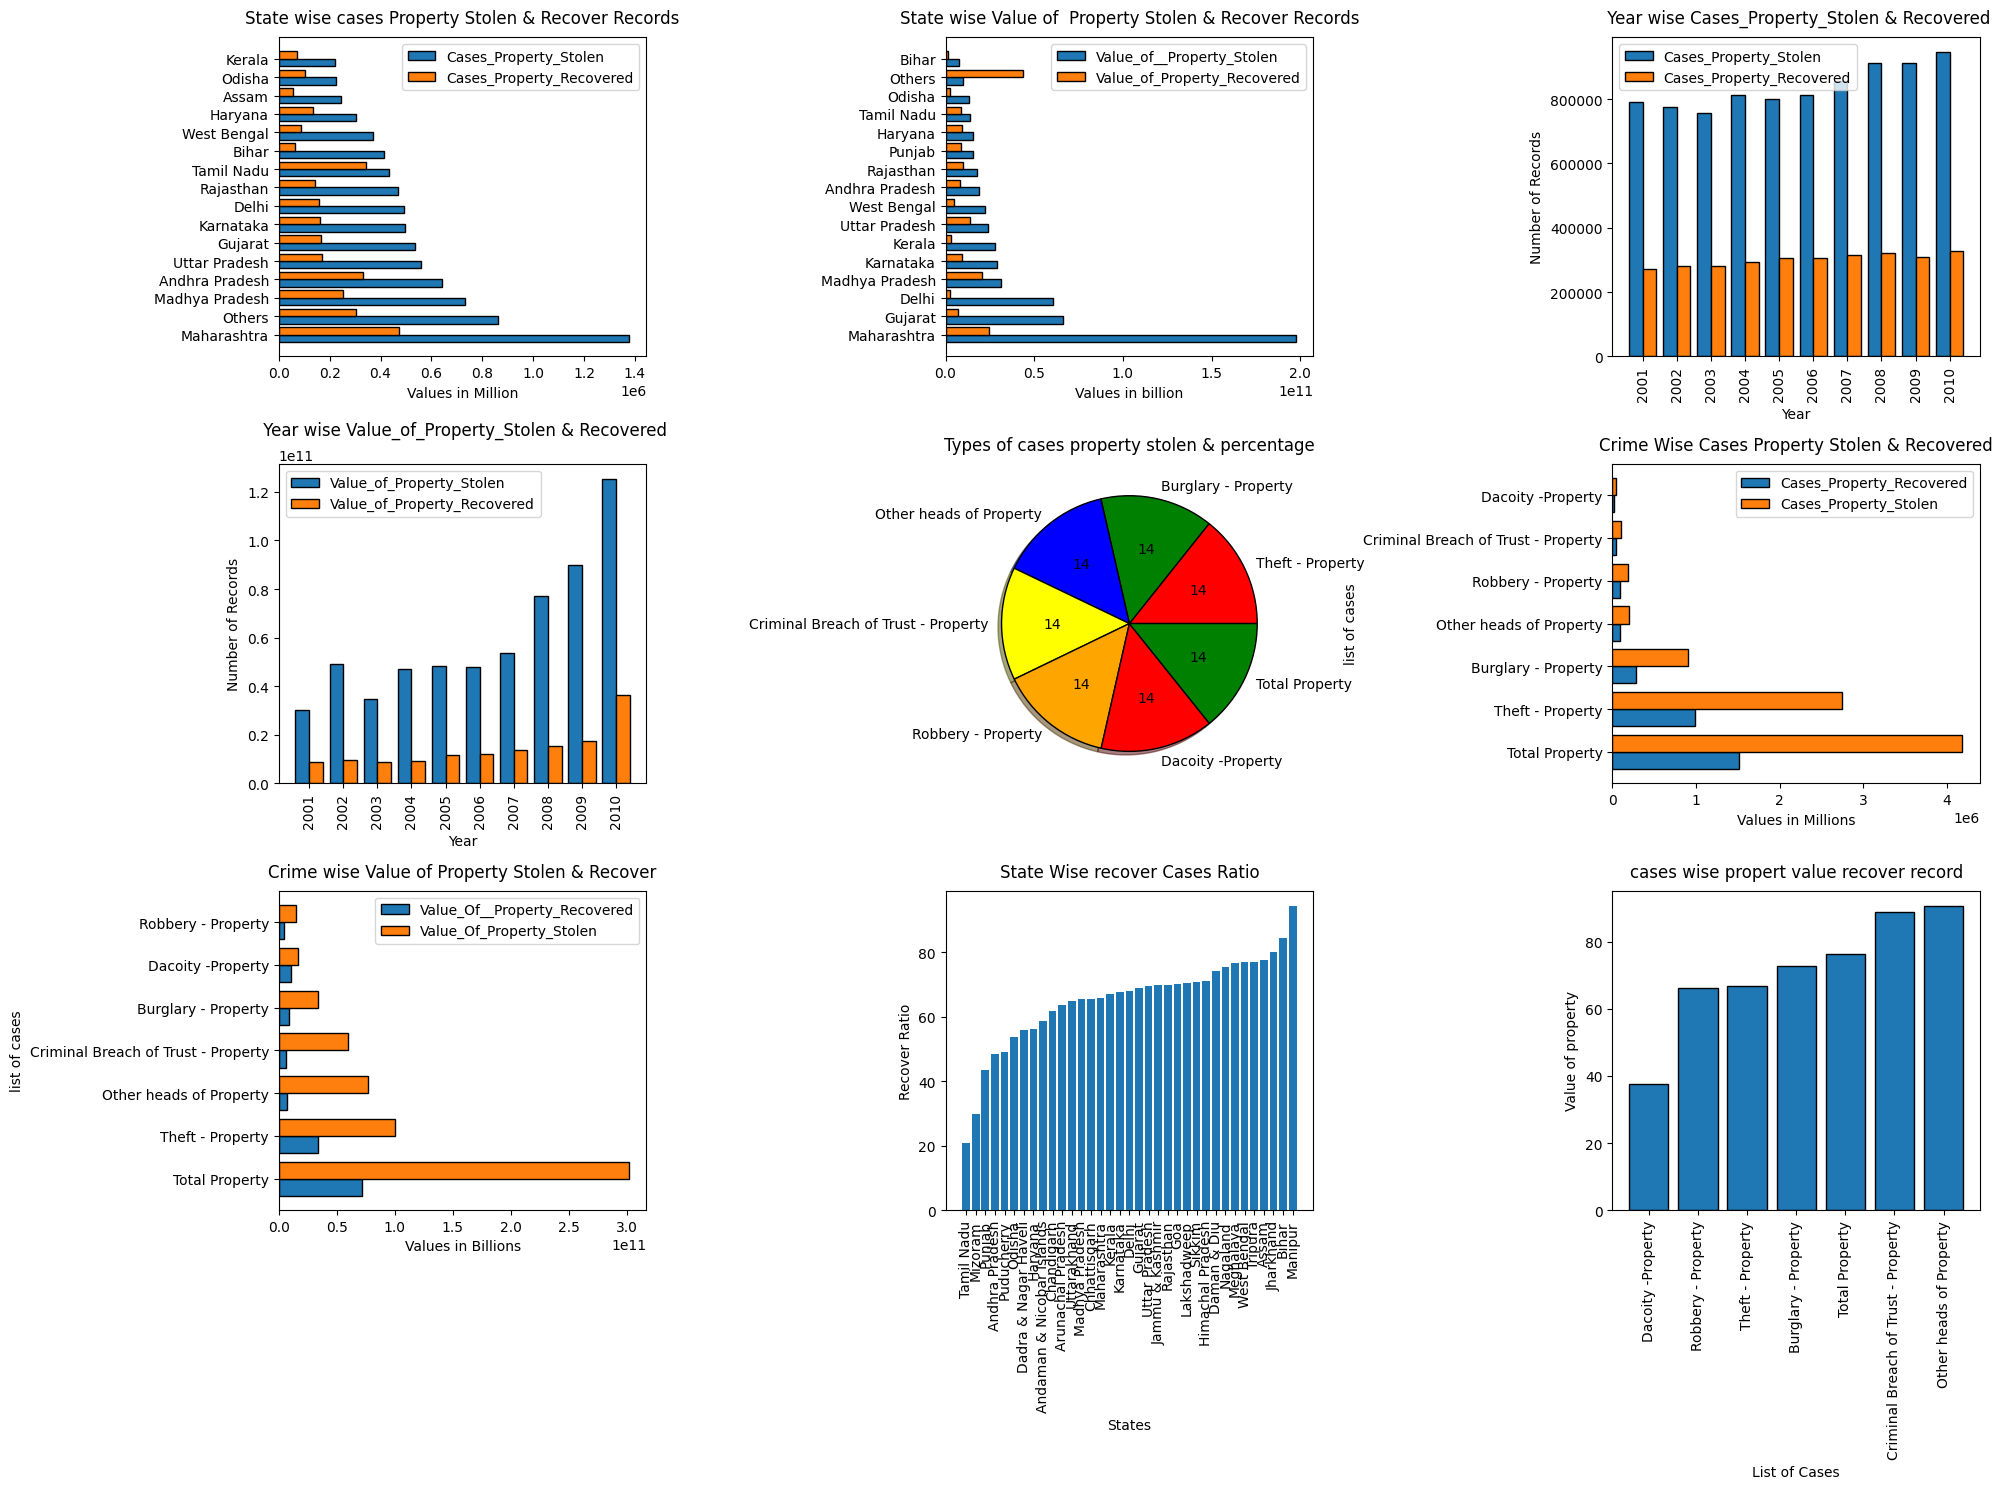

In [8]:
# plotting - property stolen and recovered by state

# set the figure size
plt.figure(figsize = (20,15))

# make the subplot
plt.subplot(3,3,1)

# prepare the data for chart
new_df1 = df[['Area_Name', 'Cases_Property_Recovered', 'Cases_Property_Stolen']].groupby('Area_Name').sum().reset_index()
new_df1.sort_values('Cases_Property_Stolen', ascending=False, inplace=True, ignore_index=True)
a = new_df1.loc[15:,'Cases_Property_Recovered'].sum()
b = new_df1.loc[15:,'Cases_Property_Stolen'].sum()
new_df1.loc[15,:]=['Others', a,b]
new_df1 = new_df1.head(16)
new_df1.sort_values('Cases_Property_Stolen', ascending=False, inplace=True, ignore_index=True)

# set the parameters for plot
w = 0.4
val1= new_df1.Cases_Property_Stolen
val2= new_df1.Cases_Property_Recovered
index_1 = new_df1.Area_Name
bar1 = np.arange(len(index_1))
bar2 = [i+w for i in bar1]
plt.barh(bar1,val1.values,w,edgecolor = 'black', label ='Cases_Property_Stolen')
plt.barh(bar2,val2.values,w,edgecolor = 'black', label = 'Cases_Property_Recovered')
plt.yticks(bar1+w/2,index_1)
plt.xlabel("Values in Million")
plt.title ("State wise cases Property Stolen & Recover Records", pad=10)
plt.legend()


plt.subplot(3,3,2)

#prepare the data for chart
new_df2 = df[['Area_Name','Value_of_Property_Stolen','Value_of_Property_Recovered']].groupby('Area_Name').sum().reset_index()
new_df2.sort_values('Value_of_Property_Stolen',inplace = True, ascending = False, ignore_index=True)
a = new_df2.loc[15:,'Value_of_Property_Recovered'].sum()
b = new_df2.loc[15:,'Value_of_Property_Stolen'].sum()
new_df2.loc[15,:]=['Others', a,b]
new_df2 = new_df2.head(16)
new_df2.sort_values('Value_of_Property_Stolen', ascending=False, inplace=True, ignore_index=True)

#set the parameters for plot
w = 0.4
val_1= new_df2.Value_of_Property_Stolen
val_2 = new_df2.Value_of_Property_Recovered
index_2 = new_df2.Area_Name
bar1 = np.arange(len(index_2))
bar2 = [i+w for i in bar1]
plt.barh(bar1,val_1.values,w,edgecolor = 'black', label ='Value_of__Property_Stolen')
plt.barh(bar2,val_2.values,w,edgecolor = 'black', label = 'Value_of_Property_Recovered')
plt.yticks(bar1+w/2,index_2)
plt.xlabel("Values in billion")
plt.title ("State wise Value of  Property Stolen & Recover Records",pad = 10)
plt.legend()

plt.subplot(3,3,3)

#prepare the data for chart
new_ta = df.groupby("Year").agg({"Cases_Property_Stolen":'sum', 'Cases_Property_Recovered':'sum',"Value_of_Property_Stolen":"sum","Value_of_Property_Recovered":"sum"}).reset_index()
new_ta.sort_values("Year",inplace = True ,)
x = new_ta['Year']
value1 = new_ta["Cases_Property_Stolen"]
value2 = new_ta["Cases_Property_Recovered"]

#set the parameter for plot
w = 0.4
bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]
plt.bar(bar1,value1,w,label = "Cases_Property_Stolen",edgecolor = 'black')
plt.bar(bar2,value2,w,label = "Cases_Property_Recovered",edgecolor = 'black')
plt.xticks(bar1+w/2,x,rotation = 90)
plt.xlabel("Year")
plt.ylabel("Number of Records")
plt.title(" Year wise Cases_Property_Stolen & Recovered",pad = 10)
plt.legend()

plt.subplot(3,3,4)

#prepare the data for chart
x = new_ta['Year']
value3 = new_ta["Value_of_Property_Stolen"]
value4 = new_ta["Value_of_Property_Recovered"]

#set the parameter for plot
w = 0.4
bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]
plt.bar(bar1,value3,w,label = "Value_of_Property_Stolen",edgecolor = 'black')
plt.bar(bar2,value4,w,label = "Value_of_Property_Recovered",edgecolor = 'black')
plt.xticks(bar1+w/2,x,rotation = 90)
plt.xlabel("Year")
plt.ylabel("Number of Records")
plt.title(" Year wise Value_of_Property_Stolen & Recovered",pad = 10)
plt.legend()



plt.subplot(3,3,5)

#prepare the data for plot
values_1 = df['Group_Name'].value_counts().reset_index()
count = values_1['count']


#set the parameter for plot
gro_name = values_1['Group_Name']
colour = ['red','green','blue','yellow','orange']
wp = {'linewidth': 1, 'edgecolor': "black"}
plt.pie(count,labels = gro_name,shadow = True,autopct='%.f',colors = colour,wedgeprops=wp, textprops=dict(color="black"))
plt.title("Types of cases property stolen & percentage",pad = 10)




plt.subplot(3,3,6)

#prepare the data for chart
df1 = df.groupby('Group_Name').agg({'Cases_Property_Recovered':'sum','Cases_Property_Stolen':'sum','Value_of_Property_Recovered':'sum','Value_of_Property_Stolen':'sum'})
df2 = df1.sort_values('Cases_Property_Stolen',ascending = False).reset_index()

#set the parameter for plor
index = df2['Group_Name']
values1 = df2['Cases_Property_Recovered']
values2 = df2['Cases_Property_Stolen']
w = 0.4
bar1 = np.arange(len(index))
bar2 = [i+w for i in bar1]
plt.barh(bar1,values1,w,edgecolor = 'black',label ='Cases_Property_Recovered' )
plt.barh(bar2,values2,w,edgecolor = 'black',label = 'Cases_Property_Stolen')
plt.xlabel("Values in Millions")
plt.ylabel("list of cases")
plt.title("Crime Wise Cases Property Stolen & Recovered",pad =10)
plt.yticks(bar1+w/2,index)
plt.legend()

plt.subplot(3,3,7)

#set the parameter for plot

df3 =df1.sort_values('Value_of_Property_Stolen',ascending = False).reset_index()
index2 = df3.Group_Name
values_1 = df3.Value_of_Property_Recovered
values_2 = df3.Value_of_Property_Stolen
w = 0.4
bar1 = np.arange(len(index2))
bar2 = [i+w for i in bar1]
plt.barh(bar1,values_1,w,edgecolor = 'black',label ='Value_Of__Property_Recovered' )
plt.barh(bar2,values_2,w,edgecolor = 'black',label = 'Value_Of_Property_Stolen')
plt.xlabel("Values in Billions")
plt.ylabel("list of cases")
plt.title("Crime wise Value of Property Stolen & Recover",pad =10)
plt.yticks(bar1+w/2,index2)
plt.legend()

plt.subplot(3,3,8)

#prepare for the chart
df4 = df.groupby("Area_Name").agg({"Cases_Property_Recovered":"sum","Cases_Property_Stolen":"sum"}).reset_index()
df4["Cases Recover Ratio"] = ((df4["Cases_Property_Stolen"]-df4["Cases_Property_Recovered"])/df4["Cases_Property_Stolen"])*100
df4.sort_values(by = "Cases Recover Ratio",inplace = True)

#set the parameter for plot
plt.bar(df4["Area_Name"],df4["Cases Recover Ratio"])
plt.xlabel("States")
plt.ylabel("Recover Ratio")
plt.title("State Wise recover Cases Ratio",pad = 10)
plt.xticks(rotation = 90)

plt.subplot(3,3,9)

#prepare for the chart

df5 = df.groupby("Group_Name").agg({"Value_of_Property_Recovered":"sum","Value_of_Property_Stolen":"sum"}).reset_index()
df5["Values of Recover Ratio"] = ((df5["Value_of_Property_Stolen"]-df5["Value_of_Property_Recovered"])/df5["Value_of_Property_Stolen"])*100
df5.sort_values(by = "Values of Recover Ratio",inplace = True)

#set the parameter for plot
plt.bar(df5["Group_Name"],df5["Values of Recover Ratio"],edgecolor = "black")
plt.xlabel("List of Cases")
plt.title("cases wise propert value recover record",pad =10)
plt.ylabel("Value of property")
plt.xticks(rotation = 90)

plt.tight_layout()
plt.show()